<a href="https://colab.research.google.com/github/Edesak/tensorflow-kurz/blob/main/01_neural_network_regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod do regrese v neuronovych sitich
Regrese je vlastne priblizovani k urcite hodnote napriklad odhat cen domu atd. (Jedna se o odhadovani cisla)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


##Data na trenovani a koukneme se na ne

(dtype('float64'), dtype('float64'))

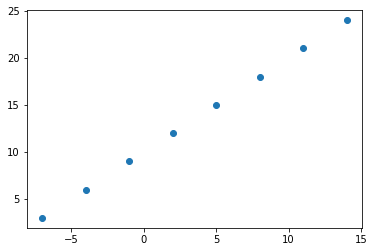

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Co odhadujeme (Co by mela NN vyprodukovat)
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Labels podle ceho se uci
y =  np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Vizualize
plt.scatter(x,y)
x.dtype,y.dtype

In [ ]:
y == x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input a Output tvary (Shapes)

In [ ]:
#Vytvoreni zkusebniho tensoru

house_info = tf.constant(["koupelna","loznice","garaz"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'koupelna', b'loznice', b'garaz'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
x[0],y[0]

(-7.0, 3.0)

In [ ]:
x[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape  = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [ ]:
x[0].ndim

0

In [ ]:
#Na tensory
x = tf.constant(x,dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape  = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

##Kroky u modelovani pomoci TF
1. Vytvoreni modelu s input a output vrstvou a skrytymi vrstvami (hidden layers)
2. Kompilace modelu (compile) spolecne s ztratovou fuknci (loss function slouzi k urceni jak je nas model spatne) a pridame optimizer, ktery upravuje nas model aby byl lepsi. Dale vyhodnocovaci funkci (Evaluation metrics) vyjadrujeme vykon/ presnost naseho modelu. 
3. Trenovani modelu 

Kroky
1. Hodit data do tensoru
2. Udelat nebo pouzit jiny model, ktery bude vhodny pro nas problem
3. Zkompilovat model
5. Natrenovat model na datech
6. Otestovat model na datech, ktere nevidel abychom vedeli jak je vykony
7. Zlepsit pomoci experimentace
8. Ulozit model a znovu trenovat

Mean Absolute Error (MAE)  je střední hodnotaabsolutní hodnoty chyb, kde  chybou se rozumírozdíl hodnot pozorování ahodnotpředpovědí. Mean  Absolute  Error  nezahrnuje žádné váhy, chyby  na všechznacích(položkách vektorů) tak ovlivňují výslednou hodnotustejně.Kvůli absolutní hodnotěnení důležité znaménko chyby, ale pouze její velikost.MAE vyjadřuje  chybu  modeluve  stejných  jednotkách  jako mají  položky  vektorů.Dosahuje nezáporných hodnot, přičemž nižší hodnoty znamenají menší chybu

Stredni hodnota z absolutni hodnoty rozdilu prave hodnoty a predikce

mean(abs(y_true - y_pred)

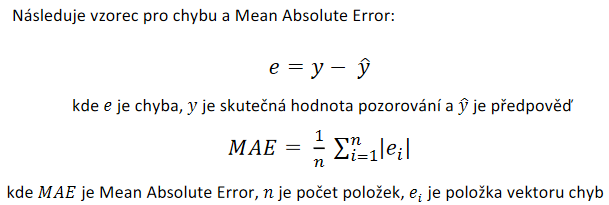

In [ ]:
#Set random seed

tf.random.set_seed(42)

#1. Sequencni API (Znamena ze model bude v nasich datech postupovat postupne)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])
#2. Slozeni modelu
model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), #stochastic radient descent
    metrics=["mae"]
)
#3. trenovani modelu
model.fit(x,y,epochs = 5)


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#Predikce 
model.predict([17.0])

array([[12.716021]], dtype=float32)

##Zlepsovani modelu
* Muzeme zlepsit model pomoci
1. Vytvareni modelu - pridanim neuronu nebo alternovanim vrstev
2. Kompilace modelu - Zmena optimimalizace nebo Learning rate
3. Pri trenovani - Nechat dele trenovat, vice trenovat, zvetsit data


In [ ]:
import tensorflow as tf


In [ ]:
#Rebuild model 

#Creat model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#Compile
model.compile(
    loss = tf.keras.losses.MAE,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#Fit

model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 199ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [ ]:
x,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
#Sestaveni 

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50,activation=None),
                             tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 272ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss

In [ ]:
model.predict([17.0])

array([[26.583803]], dtype=float32)

##Evaluating model

build-fit-evaluat.-tweak-evalu atd. 

Dulezite je vizualizovat

* Data vizualizace
* Vizualizace modelu
* Vizualizace Trenovani modelu
* Vizualizace Predikce modelu

In [ ]:
import tensorflow as tf


In [ ]:
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#musime mit labels
y = x +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

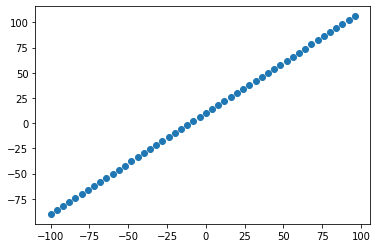

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

###3 sety train, valid, test budeme v tomto pripade potrebovat jen 2 80% na 20%
* train - data na kterych se trenuje 70-80%
* validation - data na, kterych se upravuje model 10-15%
* test - data na, kterych testujeme nas finalni model 10-15%

In [ ]:
#zkontrolujeme kolik mame dat
len(x)



50

In [ ]:
#Split the data
x_train = x[:40] #prvnich 40 je train 80% 
x_test = x[40:] #poslednich 10 je test 20%

y_train = y[:40]
y_test =  y[40:]

len(y_test),len(y_train),len(x_test),len(x_train)

(10, 40, 10, 40)

###Vizualizace dat

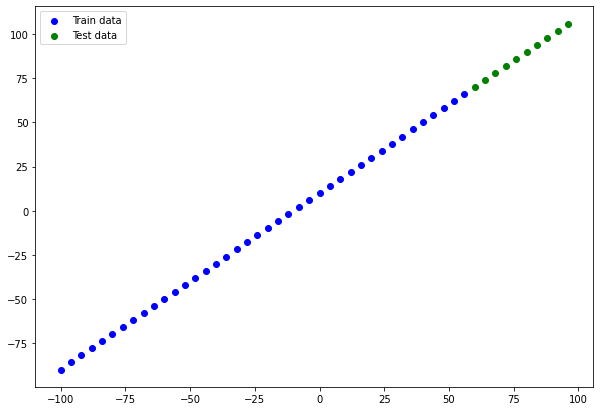

In [ ]:
plt.figure(figsize=(10,7))
#Train data in blue
plt.scatter(x_train,y_train,c="b", label="Train data")
#Test data in green
plt.scatter(x_test,y_test,c="g",label ="Test data")
plt.legend()

In [ ]:
#Udelani modelu

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)


#model.fit(x_train,y_train,epochs = 100)

###Vizualizice modelu

In [ ]:
#model.summary()

In [ ]:
x[0].shape

TensorShape([])

In [ ]:
#Vytvorit model, ktery se automaticky vytvori (build)

tf.random.set_seed(42)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(100,input_shape=[1],name="Input_layer"), #Jeden input a jedno cislo 
                                    tf.keras.layers.Dense(1,name="Output_layer")
], name= "model_1")

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss= tf.keras.losses.mae,
    metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 100)               200       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Total params - Pocet parametru, ktere jsou v modelu.
* Trainable params - Pocet parametru, ktere muze pozmenovat
* Non-trainable params - Pocet parametru, ktere nemuze pozmenovat, slouzi prevazne k pouziti jiz natrenovaneho modelu, ktery jsme importovali abychom tento model pouzili na sve vlastni reseni. 

In [ ]:
#Lets fit
model.fit(x_train,y_train,epochs=200,verbose=0)

###Vizualizace modelu pmoci TF

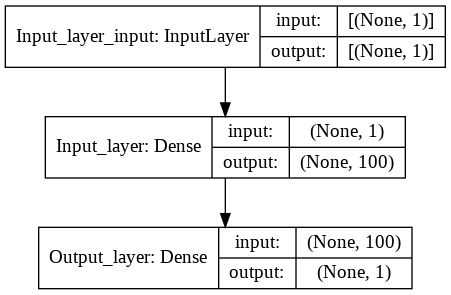

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

##Vizualizace predikci

Dobry napad je porovnat je s pravdivimi vysledky

In [ ]:
#Udelat predikci

y_pred = model.predict(x_test)
y_pred

array([[ 71.44836 ],
       [ 75.5335  ],
       [ 79.61863 ],
       [ 83.703766],
       [ 87.7889  ],
       [ 91.87405 ],
       [ 95.959175],
       [100.04432 ],
       [104.12945 ],
       [108.21458 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Hodi se udelat funkce na zobrazeni vysledku jelikoz budeme vicerokrat

def plot_pred(train_data=x_train,
              train_labels=y_train,
              test_data = x_test,
              test_labels = y_test,
              predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="b", label="Train data")
  plt.scatter(test_data,test_labels, c="g", label="Test data")
  plt.scatter(test_data,predictions,c="r",label="Predikce")
  plt.legend()


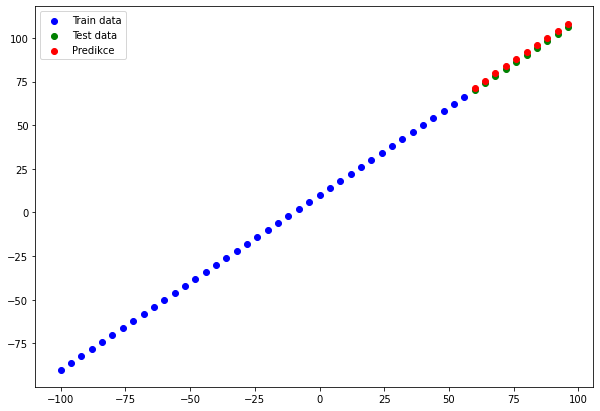

In [ ]:
plot_pred()

###Evaluting model s regresi
Kazdy problem potrebuje jinou Evaluaci
* Na tento problem je dobry start MAE
* MSE pouzit kdyz jsou velke problemy
* Huber je mezi MAE a MSE

In [ ]:
#Evaluate on test set
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 102ms/step - loss: 1.8315 - mae: 1.8315


[1.8314720392227173, 1.8314720392227173]

###Spocitani metriky samostatne

In [ ]:
#Calculate mae !!!!!!!Oba dva tensory musi byt stejne velikosti!!!!!!!!!
#tf.metrics.mae(y_test,ts_y_pred)

In [ ]:
t_y_pred = tf.constant(y_pred)
ts_y_pred = tf.squeeze(t_y_pred)
ts_y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.44836 ,  75.5335  ,  79.61863 ,  83.703766,  87.7889  ,
        91.87405 ,  95.959175, 100.04432 , 104.12945 , 108.21458 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calculate MSE 
tf.keras.losses.MSE(y_true = y_test,
                    y_pred = ts_y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.4140868>

In [ ]:
tf.keras.losses.huber(y_true= y_test,
                      y_pred = ts_y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.331472>

In [ ]:
#Make function to reuse MSE a MAE

def losses_m(y_test,y_pred,chos):
  y_test = tf.squeeze(y_test)
  y_pred = tf.squeeze(y_pred)
  if (chos == "MSE"):
    return tf.keras.losses.MSE(y_true = y_test,
                               y_pred = y_pred)
  elif(chos == "MAE"):
    return tf.keras.losses.MAE(y_true = y_test,
                               y_pred = y_pred)
  elif(chos == "huber"):
    return tf.keras.losses.huber(y_true = y_test,
                               y_pred = y_pred)
  else:
    return False

In [ ]:
losses_m(y_test,y_pred,"huber")

<tf.Tensor: shape=(), dtype=float32, numpy=1.331472>

##Delani experimentu na nasem modelu pro zlepseni

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, input_shape=[1])
],name="model_1")
model_1.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.MAE,
    metrics = ["MAE"]
)
model_1.fit(x_train,y_train,epochs=100,verbose=0)




MAE: 18.74532699584961
MSE: 353.5733947753906


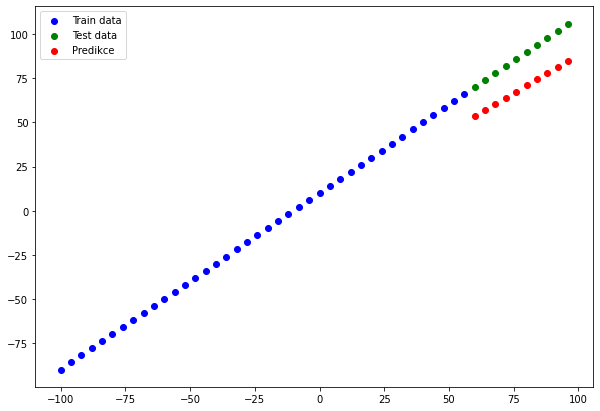

In [ ]:
y_pred_1 = model_1.predict(x_test)
plot_pred(predictions=y_pred_1)
mae_1 = losses_m(y_test,y_pred_1,"MAE")
mse_1 = losses_m(y_test,y_pred_1,"MSE")
print (f"MAE: {mae_1}")

print (f"MSE: {mse_1}")

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(20),
                                      tf.keras.layers.Dense(1)

],name="model_2")
model_2.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)
model_2.fit(x_train,y_train,epochs=100,verbose=0)

MAE: 2.9404091835021973
MSE: 11.373455047607422


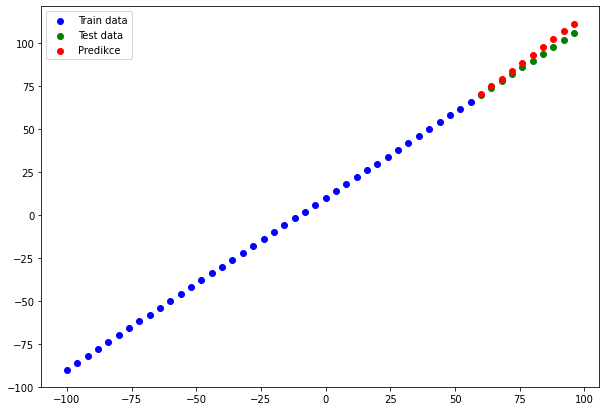

In [ ]:
y_pred_2 = model_2.predict(x_test)
plot_pred(predictions= y_pred_2)

mae_2 = losses_m(y_test,y_pred_2,"MAE")
mse_2 = losses_m(y_test,y_pred_2,"MSE")

print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(20),
                                      tf.keras.layers.Dense(1)
])
model_3.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.MAE,
    metrics=["mae"]
)
model_3.fit(x_train,y_train,epochs=500,verbose=0)

MAE: 67.11936950683594
MSE: 4587.46337890625


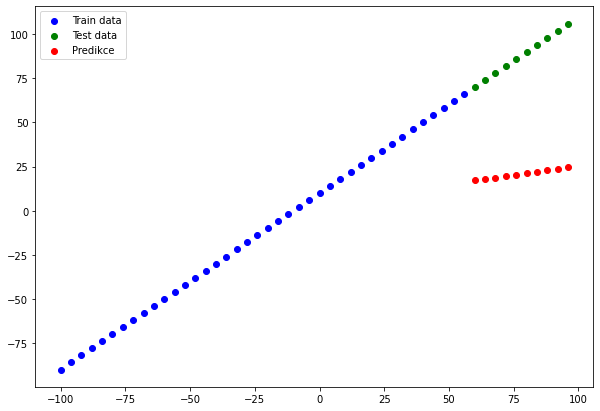

In [ ]:
y_pred_3 = model_3.predict(x_test)
plot_pred(predictions=y_pred_3)

mae_3 = losses_m(y_test,y_pred_3,"MAE")
mse_3 = losses_m(y_test,y_pred_3,"MSE")

print(f"MAE: {mae_3}")
print(f"MSE: {mse_3}")

##Porovnani modelu, ktere jsme udelali

In [ ]:
#Porovnani nasich modelu pomoci dataframu pandas

import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]
                 ]
all_results = pd.DataFrame(model_results,columns=["model","MAE","MSE"])
all_results

,model,MAE,MSE
0,model_1,18.745327,353.573395
1,model_2,2.940409,11.373455
2,model_3,67.119370,4587.463379


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


###Tracing experiments

* TensorBoard- pomaha sledovat experimenty, ktere uz probehly aby si mel prehled
* Vahy a Biasis - wandb.com

##Ulozeni modelu

Dva hlavni formaty 

1. Saved Model format (nacita se cela slozka)
2. HDF5 format (.h5) (Nacita se pouze file jelikoz se uklada jen do jendoho filu)

In [ ]:
model_2.save("best_model_yet")

INFO:tensorflow:Assets written to: best_model_yet/assets


In [ ]:
model_2.save("best_model_yet_in_HDF5.h5")

In [ ]:
#Loading model 

b_model = tf.keras.models.load_model("/content/best_model_yet")
b_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_b = b_model.predict(x_test)
y_pred_2 == y_pred_b

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Loading h5 model
b_h5_model = tf.keras.models.load_model("/content/best_model_yet_in_HDF5.h5")
b_h5_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_b_h5_pred = b_h5_model.predict(x_test)
y_pred_2 == y_b_h5_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

##Download files

pravy klid v menu files vlevo nahore

In [ ]:
from google.colab import files
files.download("/content/best_model_yet_in_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Large Example

In [ ]:
#import dulezite libr

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurence = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurence


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#One hot encoding abychom prevedli objet(string na int)
insurance_one_hot = pd.get_dummies(insurence)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#udelat x a y hodnoty 
x = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]
x,y

(      age     bmi  ...  region_southeast  region_southwest
 0      19  27.900  ...                 0                 1
 1      18  33.770  ...                 1                 0
 2      28  33.000  ...                 1                 0
 3      33  22.705  ...                 0                 0
 4      32  28.880  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 1333   50  30.970  ...                 0                 0
 1334   18  31.920  ...                 0                 0
 1335   18  36.850  ...                 1                 0
 1336   21  25.800  ...                 0                 1
 1337   61  29.070  ...                 0                 0
 
 [1338 rows x 11 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Lengt

In [ ]:
#udelani train a test datasetu
from sklearn.model_selection import train_test_split #Duleziti import
x_train_i,x_test_i,y_train_i,y_test_i = train_test_split(x,y,test_size=0.2,random_state=42)

len(x),len(x_train_i), len(x_test_i)

(1338, 1070, 268)

In [ ]:
x_train_i

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
#Udelani neuralni modelu, format ve kterym je pandas nemusime menit jelikoz je to nadstaveno na numpy takze to TF sezere

tf.random.set_seed(42)

model_ins = tf.keras.models.Sequential([
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])

model_ins.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)
model_ins.fit(x_train_i,y_train_i,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [ ]:
model_ins.evaluate(x_test_i,y_test_i)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
#Zatim nas model nebyl moc uspesny +- 7000 pricemz median je 9500 a prumer 13000
y_train_i.mean(), y_train_i.median()

(13346.089736364489, 9575.4421)

Je potreba dalsi experimenty 

In [ ]:

tf.random.set_seed(42)

model_ins_1 = tf.keras.models.Sequential([
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])

model_ins_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MAE,
    metrics = ["mae"]
)

history = model_ins_1.fit(x_train_i,y_train_i,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
model_ins_1.evaluate(x_test_i,y_test_i)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5325 - mae: 3494.5325


[3494.532470703125, 3494.532470703125]

Text(0.5, 0, 'epochs')

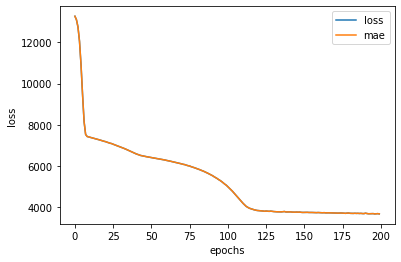

In [ ]:
#Training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Jak dlouho bych mel trenovat model? 

Zalezi :D , ale TF udelalo uzasnou vec EarlyStopping Callback

Je to nastroj, ktery zastavy trenovani tehdy kdyz se model prestane zlepsovat.

##Preprocesing data (normalizace a standartizace)
* scikit-learn ma dve funkce. 
* Hlavni vyhoda ze pri normalizovanych/standartizovanych datech NN konverguje mnohem rychleji tudiz se uci rychleji 
* normalizace 
  * MinMaxScaler 
* Standartizace 
 * StandardScaler 


In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


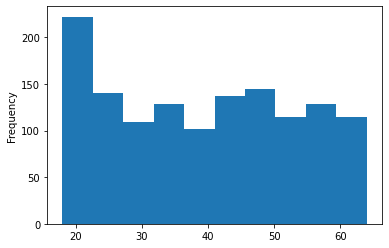

In [ ]:
x["age"].plot(kind = "hist")

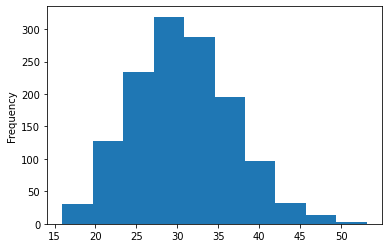

In [ ]:
x["bmi"].plot(kind = "hist")

In [ ]:
x["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

pojisteni = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
pojisteni

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Tohle vice nastudovat moc nechapu

In [ ]:
#NECHAPU
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#Vytvoreni sloupcoveho rozdeleni

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), #prehodi vsechny hodnoty na 0-1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) #Vse co nevi jak hot encodovat tak bude ignorovat. Hot endcodujeme string values
)

x_poj = pojisteni.drop("charges",axis=1)
y_poj = pojisteni["charges"]

#Vytvoreni train a test sety

x_train_poj,x_test_poj,y_train_poj,y_test_poj = train_test_split(x_poj,y_poj, test_size = 0.2, random_state=42)

ct.fit(x_train_poj) # Tohle nechapu !!!!!!!!!!!

x_train_normal_poj = ct.transform(x_train_poj)
x_test_normal_poj = ct.transform(x_test_poj)


In [ ]:
x_train_poj.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train_normal_poj[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train_poj.shape,x_train_normal_poj.shape,x_test_normal_poj.shape

((1070, 6), (1070, 11), (268, 11))

Ted uz mame normalizovane a one hot encoded data

In [ ]:
#Build a model 
tf.random.set_seed(42)

pojistovaci_model = tf.keras.models.Sequential([
                                                tf.keras.layers.Dense(100),
                                                tf.keras.layers.Dense(10),
                                                tf.keras.layers.Dense(1)
])

pojistovaci_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

pojistovaci_model.fit(x_train_normal_poj,y_train_poj,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
pojistovaci_model.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5779 - mae: 3171.5779


[3171.577880859375, 3171.577880859375]

#Cviceni

In [ ]:
x_cv = tf.range(-1000,1000,4)
y_cv = x_cv + 42

In [ ]:
x_cv

<tf.Tensor: shape=(500,), dtype=int32, numpy=
array([-1000,  -996,  -992,  -988,  -984,  -980,  -976,  -972,  -968,
        -964,  -960,  -956,  -952,  -948,  -944,  -940,  -936,  -932,
        -928,  -924,  -920,  -916,  -912,  -908,  -904,  -900,  -896,
        -892,  -888,  -884,  -880,  -876,  -872,  -868,  -864,  -860,
        -856,  -852,  -848,  -844,  -840,  -836,  -832,  -828,  -824,
        -820,  -816,  -812,  -808,  -804,  -800,  -796,  -792,  -788,
        -784,  -780,  -776,  -772,  -768,  -764,  -760,  -756,  -752,
        -748,  -744,  -740,  -736,  -732,  -728,  -724,  -720,  -716,
        -712,  -708,  -704,  -700,  -696,  -692,  -688,  -684,  -680,
        -676,  -672,  -668,  -664,  -660,  -656,  -652,  -648,  -644,
        -640,  -636,  -632,  -628,  -624,  -620,  -616,  -612,  -608,
        -604,  -600,  -596,  -592,  -588,  -584,  -580,  -576,  -572,
        -568,  -564,  -560,  -556,  -552,  -548,  -544,  -540,  -536,
        -532,  -528,  -524,  -520,  -516,  -

In [ ]:
y_cv

<tf.Tensor: shape=(500,), dtype=int32, numpy=
array([-958, -954, -950, -946, -942, -938, -934, -930, -926, -922, -918,
       -914, -910, -906, -902, -898, -894, -890, -886, -882, -878, -874,
       -870, -866, -862, -858, -854, -850, -846, -842, -838, -834, -830,
       -826, -822, -818, -814, -810, -806, -802, -798, -794, -790, -786,
       -782, -778, -774, -770, -766, -762, -758, -754, -750, -746, -742,
       -738, -734, -730, -726, -722, -718, -714, -710, -706, -702, -698,
       -694, -690, -686, -682, -678, -674, -670, -666, -662, -658, -654,
       -650, -646, -642, -638, -634, -630, -626, -622, -618, -614, -610,
       -606, -602, -598, -594, -590, -586, -582, -578, -574, -570, -566,
       -562, -558, -554, -550, -546, -542, -538, -534, -530, -526, -522,
       -518, -514, -510, -506, -502, -498, -494, -490, -486, -482, -478,
       -474, -470, -466, -462, -458, -454, -450, -446, -442, -438, -434,
       -430, -426, -422, -418, -414, -410, -406, -402, -398, -394, -390,
     

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_cv.dtype

tf.int32

In [ ]:
x_cv.shape

TensorShape([500])

In [ ]:
5000*0.8

4000.0

In [ ]:
x_cv_train = x_cv[:400]
x_cv_test = x_cv[400:]
y_cv_train = y_cv[:400]
y_cv_test = y_cv[400:]

tf.size(x_cv_train),tf.size(x_cv_test),tf.size(y_cv_train),tf.size(y_cv_test)


(<tf.Tensor: shape=(), dtype=int32, numpy=400>,
 <tf.Tensor: shape=(), dtype=int32, numpy=100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=400>,
 <tf.Tensor: shape=(), dtype=int32, numpy=100>)

In [ ]:
tf.random.set_seed(42)

cv_model = tf.keras.models.Sequential([
                                       tf.keras.layers.Dense(1000),
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

cv_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

history = cv_model.fit(x_cv_train,y_cv_train,epochs=200)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 149.5182 - mae: 149.5182
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 55.1205 - mae: 55.1205
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 48.9331 - mae: 48.9331
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 40.9742 - mae: 40.9742
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 36.0479 - mae: 36.0479
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 33.6391 - mae: 33.6391
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 31.8026 - mae: 31.8026
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 30.0430 - mae: 30.0430
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 31.5710 - mae: 31.5710
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 31.9356 - mae: 31.9356
Epoch 11/200
13/13 [=================

In [ ]:
cv_model.evaluate(x_cv_test,y_cv_test)

4/4 [==============================] - 0s 3ms/step - loss: 8.7899 - mae: 8.7899


[8.789855003356934, 8.789855003356934]

Text(0, 0.5, 'loss')

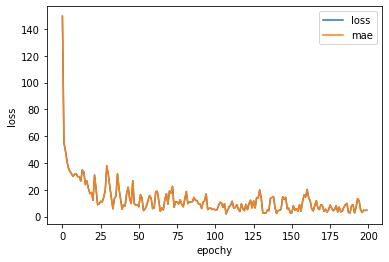

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochy")
plt.ylabel("loss")

In [ ]:
y_cv_test

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([ 642,  646,  650,  654,  658,  662,  666,  670,  674,  678,  682,
        686,  690,  694,  698,  702,  706,  710,  714,  718,  722,  726,
        730,  734,  738,  742,  746,  750,  754,  758,  762,  766,  770,
        774,  778,  782,  786,  790,  794,  798,  802,  806,  810,  814,
        818,  822,  826,  830,  834,  838,  842,  846,  850,  854,  858,
        862,  866,  870,  874,  878,  882,  886,  890,  894,  898,  902,
        906,  910,  914,  918,  922,  926,  930,  934,  938,  942,  946,
        950,  954,  958,  962,  966,  970,  974,  978,  982,  986,  990,
        994,  998, 1002, 1006, 1010, 1014, 1018, 1022, 1026, 1030, 1034,
       1038], dtype=int32)>

In [ ]:
x_cv_test

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([600, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648,
       652, 656, 660, 664, 668, 672, 676, 680, 684, 688, 692, 696, 700,
       704, 708, 712, 716, 720, 724, 728, 732, 736, 740, 744, 748, 752,
       756, 760, 764, 768, 772, 776, 780, 784, 788, 792, 796, 800, 804,
       808, 812, 816, 820, 824, 828, 832, 836, 840, 844, 848, 852, 856,
       860, 864, 868, 872, 876, 880, 884, 888, 892, 896, 900, 904, 908,
       912, 916, 920, 924, 928, 932, 936, 940, 944, 948, 952, 956, 960,
       964, 968, 972, 976, 980, 984, 988, 992, 996], dtype=int32)>

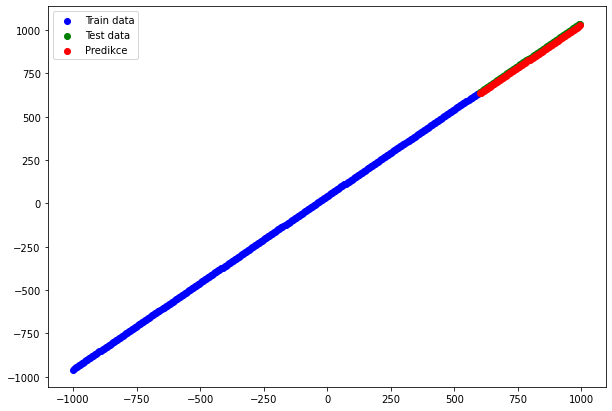

In [ ]:
y_cv_pred = cv_model.predict(x_cv_test)
plot_pred(x_cv_train,y_cv_train,x_cv_test,y_cv_test,y_cv_pred)

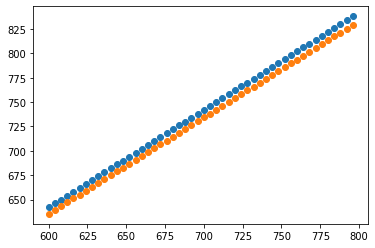

In [ ]:
plt.scatter(x_cv_test[:50],y_cv_test[:50])
plt.scatter(x_cv_test[:50],y_cv_pred[:50])

In [ ]:
x_cv_test[1]

<tf.Tensor: shape=(), dtype=int32, numpy=604>

In [ ]:
cv_model.predict(x_cv_test[:1])

array([[635.25964]], dtype=float32)

In [ ]:
y_cv_test[:1]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([642], dtype=int32)>

In [ ]:
#1 pokus o zlepseni dat na pojisteni pridani dalsi vrstvy

tf.random.set_seed(42)

pojistovaci_model_1 = tf.keras.models.Sequential([
                                                  tf.keras.layers.Dense(100),
                                                  tf.keras.layers.Dense(100),
                                                  tf.keras.layers.Dense(10),
                                                  tf.keras.layers.Dense(1)
])

pojistovaci_model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

history = pojistovaci_model_1.fit(x_train_normal_poj,y_train_poj,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13340.0576 - mae: 13340.0576
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13274.2129 - mae: 13274.2129
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12902.4678 - mae: 12902.4678
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11627.9053 - mae: 11627.9053
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9409.8877 - mae: 9409.8877
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8040.1831 - mae: 8040.1831
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7812.9688 - mae: 7812.9688
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7643.8760 - mae: 7643.8760
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7474.1938 - mae: 7474.1938
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7287.1392 - mae: 7

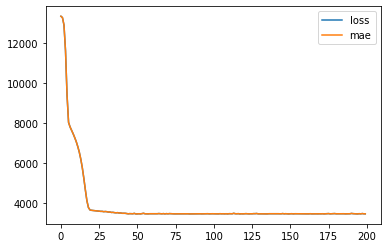

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
pojistovaci_model_1.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3175.5806 - mae: 3175.5806


[3175.58056640625, 3175.58056640625]

In [ ]:
pojistovaci_model.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5779 - mae: 3171.5779


[3171.577880859375, 3171.577880859375]

In [ ]:
tf.random.set_seed(42)

pojistovaci_model_2 = tf.keras.models.Sequential([
                                                  tf.keras.layers.Dense(1000),
                                                  tf.keras.layers.Dense(100),
                                                  tf.keras.layers.Dense(10),
                                                  tf.keras.layers.Dense(1)
])

pojistovaci_model_2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)
pojistovaci_model_2.fit(x_train_normal_poj,y_train_poj,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13303.1553 - mae: 13303.1553
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12620.8047 - mae: 12620.8047
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 9736.9014 - mae: 9736.9014
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7884.0029 - mae: 7884.0029
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7571.4180 - mae: 7571.4180
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7237.5376 - mae: 7237.5376
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6786.6162 - mae: 6786.6162
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6169.7329 - mae: 6169.7329
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 5275.5742 - mae: 5275.5742
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 4267.9863 - mae: 4267.

In [ ]:
pojistovaci_model.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5779 - mae: 3171.5779


[3171.577880859375, 3171.577880859375]

In [ ]:
pojistovaci_model_1.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3175.5806 - mae: 3175.5806


[3175.58056640625, 3175.58056640625]

In [ ]:
pojistovaci_model_2.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3173.7439 - mae: 3173.7439


[3173.743896484375, 3173.743896484375]

In [ ]:
tf.random.set_seed(42)

pojistovaci_model_3 = tf.keras.models.Sequential([
                                                  #tf.keras.layers.Dense(1000),
                                                  tf.keras.layers.Dense(100),
                                                  tf.keras.layers.Dense(10),
                                                  tf.keras.layers.Dense(1)
])

pojistovaci_model_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)
pojistovaci_model_3.fit(x_train_normal_poj,y_train_poj,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13217.9922 - mae: 13217.9922
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11378.7979 - mae: 11378.7979
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 8112.9438 - mae: 8112.9438
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7588.9111 - mae: 7588.9111
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7103.4795 - mae: 7103.4795
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6513.8721 - mae: 6513.8721
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 5594.0000 - mae: 5594.0000
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4434.3428 - mae: 4434.3428
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3745.8264 - mae: 3745.8264
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3679.4285 - mae: 3679.

In [ ]:
pojistovaci_model_3.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3162.5105 - mae: 3162.5105


[3162.510498046875, 3162.510498046875]

In [ ]:
tf.random.set_seed(42)

pojistovaci_model_4 = tf.keras.models.Sequential([
                                                  #tf.keras.layers.Dense(1000),
                                                  tf.keras.layers.Dense(100),
                                                  tf.keras.layers.Dense(10),
                                                  tf.keras.layers.Dense(1)
])
pojistovaci_model_4.compile(
    optimizer = tf.keras.optimizers.Adam(lr= 0.01),
    loss = tf.keras.losses.mae,
    metrics = ["mae"]
)

pojistovaci_model_4.fit(x_train_normal_poj,y_train_poj,epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


34/34 [==============================] - 0s 2ms/step - loss: 13217.9922 - mae: 13217.9922
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 11378.7979 - mae: 11378.7979
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 8112.9438 - mae: 8112.9438
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7588.9111 - mae: 7588.9111
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 7103.4790 - mae: 7103.4790
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 6513.8721 - mae: 6513.8721
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 5594.0000 - mae: 5594.0000
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 4434.3428 - mae: 4434.3428
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3745.8264 - mae: 3745.8264
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3679.4287 - mae: 3679.4287
Epoch 1

In [ ]:
pojistovaci_model_4.evaluate(x_test_normal_poj,y_test_poj)

9/9 [==============================] - 0s 2ms/step - loss: 3163.2520 - mae: 3163.2520


[3163.251953125, 3163.251953125]

In [ ]:
import tensorflow as tf

(x_boston_train,y_boston_train),(x_boston_test,y_boston_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing.npz', test_split=0.2, seed = 42 ) 

In [ ]:
x_boston_test.shape

(102, 13)

In [ ]:
tf.random.set_seed(42)

model_boston = tf.keras.models.Sequential([
                                           #tf.keras.layers.Dense(100,activation=tf.keras.activations.linear),
                                           tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                                           tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                                           tf.keras.layers.Dense(1)

])

model_boston.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.MAE,
    metrics = ["mae"]
)

model_boston.fit(x_boston_train,y_boston_train, epochs=5000, validation_split=0.1)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
12/12 [==============================] - 0s 5ms/step - loss: 1.5584 - mae: 1.4496 - val_loss: 2.2054 - val_mae: 2.0965
Epoch 2502/5000
12/12 [==============================] - 0s 5ms/step - loss: 1.4104 - mae: 1.3016 - val_loss: 2.0312 - val_mae: 1.9223
Epoch 2503/5000
12/12 [==============================] - 0s 5ms/step - loss: 1.4225 - mae: 1.3136 - val_loss: 2.0118 - val_mae: 1.9029
Epoch 2504/5000
12/12 [==============================] - 0s 5ms/step - loss: 1.4436 - mae: 1.3347 - val_loss: 2.0010 - val_mae: 1.8920
Epoch 2505/5000
12/12 [==============================] - 0s 5ms/step - loss: 1.7147 - mae: 1.6057 - val_loss: 2.5256 - val_mae: 2.4166
Epoch 2506/5000
12/12 [==============================] - 0s 7ms/step - loss: 1.8498 - mae: 1.7407 - val_loss: 2.1857 - val_mae: 2.0767
Epoch 2507/5000
12/12 [==============================] - 0s 6ms/step - loss: 1.6539 - mae: 1.5449 - val_loss: 2.3106 - val_mae: 2.2016
Epoc

In [ ]:
model_boston.evaluate(x_boston_test,y_boston_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.4994 - mae: 2.3689


[2.499413251876831, 2.368892192840576]